# Training Deep Neural Networks

## Vanishing/Exploding Gradient Problem

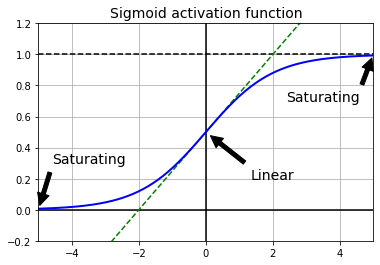

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def logit(z):
    return 1 / (1 + np.exp(-z))

# Define the input space
z = np.linspace(-5, 5, 200)

# Plot the Logit activation function (Sigmoid)
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [1, 1], "k--")
plt.plot([0, 0], [-0.2, 1.2], "k-")

plt.plot([-5, 5], [-3/4, 7/4], "g--")
plt.plot(z, logit(z), "b-", linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### Xavier and He Initialization

In [2]:
import tensorflow as tf
from tensorflow import keras

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
# Layer with ReLU activation and He normal initialization
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
# The default mode for this initialization is `fan_in`
#  - to switch to `fan_avg` one has to use `VarianceScaling`
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

### Nonsaturating Activation Functions

#### Leaky ReLU
$\text{LeakyReLU}_\alpha(z) = \max(\alpha z, z)$

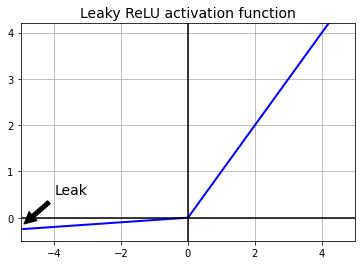

In [5]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

# Plot the LeakyReLU activation function
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')

plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [6]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [7]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [8]:
# Load, split and scale the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
max_value = 255.0
val_split = 5000
X_train_full = X_train_full / max_value
X_test = X_test / max_value
X_valid, X_train = X_train_full[:val_split], X_train_full[val_split:]
y_valid, y_train = y_train_full[:val_split], y_train_full[val_split:]

# Set RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Build a model with LeakyReLU activations and He normal initialization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Train and validate the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8416 - accuracy: 0.7246 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7053 - accuracy: 0.7637 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6325 - accuracy: 0.7908 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5992 - accuracy: 0.8019 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5624 - accuracy: 0.8141 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5379 - accuracy: 0.8218 - val_loss: 0.5157 - val_accuracy:

#### PReLU

In [9]:
# Reset the RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Build the same model but with PReLU activation
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.6969 - accuracy: 0.4974 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8706 - accuracy: 0.7247 - val_loss: 0.7305 - val_accuracy: 0.7632
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7211 - accuracy: 0.7620 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6448 - accuracy: 0.7880 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6078 - accuracy: 0.8003 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5693 - accuracy: 0.8119 - val_loss: 0.5407 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5428 - accuracy: 0.8193 - val_loss: 0.5196 - val_accuracy

#### ELU

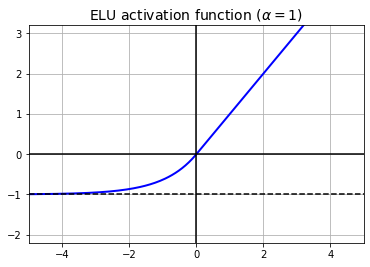

In [10]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

# Plot the ELU activation function
plt.plot(z, elu(z), "b-", linewidth=2)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

#### SELU

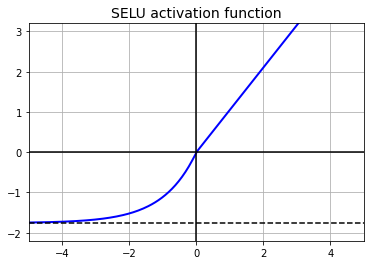

In [11]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

# Plot the SELU activation function
plt.plot(z, selu(z), "b-", linewidth=2)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [12]:
# Reset the numpy RNG
np.random.seed(42)

# Standardized inputs
Z = np.random.normal(size=(500, 100))

# Stack of 1k dense layers
for layer in range(1000):
    # LeCun initialization
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [13]:
keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [14]:
# Reset the RNG state
np.random.seed(42)
tf.random.set_seed(42)

# Build a 100 layer DNN with SELU activation and LeCun initialization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Scale the Fashion MNIST inputs to mean 0 and std 1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Train the model for 5 epochs
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 27s 14ms/step - loss: 1.3414 - accuracy: 0.4814 - val_loss: 0.7377 - val_accuracy: 0.7502
Epoch 2/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.7292 - accuracy: 0.7406 - val_loss: 0.5861 - val_accuracy: 0.7832
Epoch 3/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5890 - accuracy: 0.7893 - val_loss: 0.6003 - val_accuracy: 0.7920
Epoch 4/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5440 - accuracy: 0.8130 - val_loss: 0.4992 - val_accuracy: 0.8310
Epoch 5/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5055 - accuracy: 0.8239 - val_loss: 0.4923 - val_accuracy: 0.8300


In [15]:
# Reset the RNG state
np.random.seed(42)
tf.random.set_seed(42)

# Build the same model but with ReLU activation for comparison
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 25s 13ms/step - loss: 2.0605 - accuracy: 0.1875 - val_loss: 1.2408 - val_accuracy: 0.4554
Epoch 2/5
1719/1719 [==============================] - 21s 12ms/step - loss: 1.2370 - accuracy: 0.4725 - val_loss: 0.9193 - val_accuracy: 0.5934
Epoch 3/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.9940 - accuracy: 0.5775 - val_loss: 1.1140 - val_accuracy: 0.5152
Epoch 4/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.9765 - accuracy: 0.5971 - val_loss: 0.7640 - val_accuracy: 0.7128
Epoch 5/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.7494 - accuracy: 0.7122 - val_loss: 0.7422 - val_accuracy: 0.7186


## Batch Normalization
The problem that *batch normalization* addresses is to prevent gradient from vanishing/exploding even during training, i.e. not just initialization. The idea is to keep layer inputs zero-centered and normalized by adding an extra operation before or after activation function. The algorithm is following:
1. $\mathbf{\mu}_B = \frac{1}{m_B}\sum_{i = 1}^{m_B} \mathbf{x}^{(i)}$ .................... $\mathbf{\mu}_B$ is the a of input means evaluated over the whole mini-batch $B$ containing $m_B$ instances
1. $\mathbf{\sigma}_B^2 = \frac{1}{m_B}\sum_{i = 1}^{m_B} (\mathbf{x}^{(i)} - \mathbf{\mu}_B)^2$ ..... $\mathbf{\sigma}_B$ is a vector of input standard deviations
1. $\hat{\mathbf{x}}^{(i)} = \frac{\mathbf{x}^{(i)} - \mathbf{\mu}_B}{\sqrt{\mathbf{\sigma}_B^2 + \epsilon}}$ ............................... $\hat{\mathbf{x}}^{(i)}$ is a vector of zero-centered and normalized inputs for instance $i$ where $\epsilon$ is a *smootning term* (a small number preventing division by zero)
1. $\mathbf{z}^{(i)} = \mathbf{\gamma} \otimes \hat{\mathbf{x}}^{(i)} + \mathbf{\beta}$ ...................... $\mathbf{z}^{(i)}$ is the output of BN operation, it is a rescaled and shifted version of the inputs where $\mathbf{\gamma}$ ($\mathbf{\beta}$) is a scaling (shift/offset) parameter of the layer and $\otimes$ is element-wise multiplication

Wheat remains is to answer how to normalize test instances which are applied one after another (there are no batches, moreover test instances may not be *iid*, so computing any reliable statistic is not possible). In other words what is the final $\mathbf{\mu}_B$ and $\mathbf{\sigma}_B^2$ ($\mathbf{\gamma}$ and $\mathbf{\beta}$ are learned during trainging as additional parameters)? There are two options - the latter is typically implemented (e.g. by Keras):
1. Run the whole training set through the network again after training to compute the instance means and std
1. Estimate these during traingin as exponential moving averages: $\hat{\mathbf{v}} \gets \text{momentum} \times \hat{\mathbf{v}} + (1 - \text{momentum}) \times \mathbf{v}$ where *momentum* is a BN hyper-parameter, $\hat{\mathbf{v}}$ is the exp. moving avg. and $\mathbf{v}$ are current batch means

In [16]:
# Build a sequential model with batch normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

# Show model structure
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_211 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_212 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_213 (Dense)            (None, 10)               

In [17]:
bn1 = model.layers[1]
for var in bn1.variables:
    print(f"Trainable: {var.trainable}\tName: {var.name}")

Trainable: True	Name: batch_normalization/gamma:0
Trainable: True	Name: batch_normalization/beta:0
Trainable: False	Name: batch_normalization/moving_mean:0
Trainable: False	Name: batch_normalization/moving_variance:0


In [18]:
# Compile and train the model for 10 epochs

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2287 - accuracy: 0.5993 - val_loss: 0.5526 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5996 - accuracy: 0.7960 - val_loss: 0.4726 - val_accuracy: 0.8470
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5312 - accuracy: 0.8170 - val_loss: 0.4376 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4884 - accuracy: 0.8293 - val_loss: 0.4153 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4718 - accuracy: 0.8344 - val_loss: 0.3997 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4419 - accuracy: 0.8459 - val_loss: 0.3867 - val_accuracy: 0.8692
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4286 - accuracy: 0.8496 - val_loss: 0.3764 - val_accuracy:

Sometimes applying BN before the activation function works better. One advantage of doing so is that the batch-normalized layer does not need a bias term and we can save some parameters.

In [19]:
# Build and train a batch-normalized model
#  - normalization is used before activation and biases are switched off
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3677 - accuracy: 0.5605 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7135 - accuracy: 0.7703 - val_loss: 0.5566 - val_accuracy: 0.8186
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6123 - accuracy: 0.7991 - val_loss: 0.5007 - val_accuracy: 0.8364
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5547 - accuracy: 0.8148 - val_loss: 0.4666 - val_accuracy: 0.8450
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5254 - accuracy: 0.8232 - val_loss: 0.4434 - val_accuracy: 0.8536
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4947 - accuracy: 0.8325 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4736 - accuracy: 0.8387 - val_loss: 0.4131 - val_accuracy:

### Gradient Clipping
This technique is most often used for RNNs where using BN is quite tricky. Gradient clipping can be set for an optimizer by one of two parameters:
* `clipvalue` - simply clips values to fit in given bounds
* `clipnorm` - preserves gradient direction by using $\ell_2$ norm instead (but while doing this it can produce values close to 0)

Following will transform gradient values $[0.9, 100.0] \to [0.9, 1.0]$.

In [20]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

While using the norm will produce $[0.9, 100.0] \to [0.00899964, 0.9999595]$ (notice that first component is very close to zero so this option does not really help with the vanishing gradient).

In [21]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Reusing Pretrained Layers

#### Reusing a Keras model
Let's take a Fashion MNIST dataset and pretend there's an existing pre-trained model that can classify images to all but two classes. Out task is to classify images to these two classes (sandals and shirts).

This example is fine-tuned in the stype of *torturing the data until it confesses*, typically *transfer learning* does not work for shallow and wide nets because the patterns learned in lower layers are not general enough. On the contrary, it works pretty well for deep convolutional networks.

In [22]:
import os

# Reset RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Split the dataset into
# A - data that our pre-trained model is trained on (not containing sandals and shirts)
# B - small dataset for our taks (containing sandals and shirts)

sandals_class, shirts_class = 5, 6

def split_dataset(X, y):
    # sandals or shirts
    y_sandals_or_shirts = (y == sandals_class) | (y == shirts_class)
    y_A = y[~y_sandals_or_shirts]
    # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_A[y_A > shirts_class] -= 2
    # binary classification task: is it a shirt (class 6)?
    y_B = (y[y_sandals_or_shirts] == shirts_class).astype(np.float32)
    return (X[~y_sandals_or_shirts], y_A), (X[y_sandals_or_shirts], y_B)

# Split the data into training, validation and test sets for tasks A and B
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

# Sub-select a small dataset for taks B (sandals and shirts)
dataset_size = 200
X_train_B = X_train_B[:dataset_size]
y_train_B = y_train_B[:dataset_size]


# Build and pre-train and save model A
model_A_path = os.path.join("data", "my_model_A.h5")

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
model_A.save(model_A_path)

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.9249 - accuracy: 0.6994 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3651 - accuracy: 0.8745 - val_loss: 0.3286 - val_accuracy: 0.8832
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3182 - accuracy: 0.8894 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3048 - accuracy: 0.8956 - val_loss: 0.2896 - val_accuracy: 0.9016
Epoch 5/20
1375/1375 [==============================] - 3s 3ms/step - loss: 0.2804 - accuracy: 0.9029 - val_loss: 0.2777 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2701 - accuracy: 0.9077 - val_loss: 0.2735 - val_accuracy: 0.9068
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2627 - accuracy: 0.9094 - val_loss: 0.2716 - val_accuracy:

In [23]:
# Next let's use the same architecture for taks B
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Train this model on just 200 instances for task B
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

# Evaluate model B on the test set
_, acc_B = model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 [==============================] - 1s 62ms/step - loss: 1.0360 - accuracy: 0.4975 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 22ms/step - loss: 0.5883 - accuracy: 0.6971 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 22ms/step - loss: 0.4380 - accuracy: 0.8854 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 23ms/step - loss: 0.4021 - accuracy: 0.8712 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 22ms/step - loss: 0.3361 - accuracy: 0.9348 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 22ms/step - loss: 0.3113 - accuracy: 0.9233 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 22ms/step - loss: 0.2817 - accuracy: 0.9299 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

Next let's try to reuse model A for task B. One can either directly link model A's layers and weights (`model.layers[:-1]`) to model B or clone model A (and it's weights) to make an independent model B like so
```python
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
```

In [24]:
def transfer_learn(pretrained_model, X_train, X_valid, y_train, y_valid, epochs_init=4, epochs_train=16, lr_init=1e-3, lr_train=1e-3):
    # Reuse all but output layers and and new output for this task
    reused_layers = pretrained_model.layers[:-1]
    model = keras.models.Sequential(reused_layers)
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    
    # Freeze weights of reused layers' weights for first couple of epochs
    for layer in reused_layers:
        layer.trainable = False
     
    # Model must be re-compiled each time we modify layers
    model.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.SGD(lr=lr_init),
        metrics=["accuracy"],
    )
    
    # Short initial training with weights reused layers being locked to learn reasonable weights for the output
    history = model.fit(X_train, y_train, epochs=epochs_init, validation_data=(X_valid, y_valid))
    
    # Unlock all weights
    for layer in reused_layers:
        layer.trainable = True
        
    # Recompile the model - use small learning rate so the reused weights are not completely destroyed
    model.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.SGD(lr=lr_train),
        metrics=["accuracy"],
    )

    history = model.fit(X_train, y_train, epochs=epochs_train, validation_data=(X_valid, y_valid))
    return model


# Load pre-trained model for task A
model_A = keras.models.load_model(model_A_path)

# Transfer-learn model for task B
model_B = transfer_learn(model_A, X_train_B, X_valid_B, y_train_B, y_valid_B)

# Evaluate new model B on the test set
_, acc_B_tl = model_B.evaluate(X_test_B, y_test_B)

# Display error rate imrovement
acc_improvement = (100 - acc_B) / (100 - acc_B_tl)
acc_improvement

Epoch 1/4
7/7 [==============================] - 1s 70ms/step - loss: 0.6135 - accuracy: 0.6184 - val_loss: 0.5822 - val_accuracy: 0.6359
Epoch 2/4
7/7 [==============================] - 0s 26ms/step - loss: 0.5530 - accuracy: 0.6638 - val_loss: 0.5449 - val_accuracy: 0.6805
Epoch 3/4
7/7 [==============================] - 0s 27ms/step - loss: 0.4874 - accuracy: 0.7531 - val_loss: 0.5129 - val_accuracy: 0.7099
Epoch 4/4
7/7 [==============================] - 0s 26ms/step - loss: 0.4878 - accuracy: 0.7405 - val_loss: 0.4843 - val_accuracy: 0.7333
Epoch 1/16
7/7 [==============================] - 1s 69ms/step - loss: 0.4367 - accuracy: 0.7823 - val_loss: 0.3452 - val_accuracy: 0.8641
Epoch 2/16
7/7 [==============================] - 0s 23ms/step - loss: 0.2963 - accuracy: 0.9143 - val_loss: 0.2599 - val_accuracy: 0.9300
Epoch 3/16
7/7 [==============================] - 0s 24ms/step - loss: 0.2029 - accuracy: 0.9777 - val_loss: 0.2108 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

1.0002272564418244

## Faster Optimizers
Standard gradient discent step: $\mathbf{\theta} \gets \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}J(\mathbf{\theta})$

### Momentum optimization
The idea is to use the gradient not as a speed but as an acceleration (just like a ball rolling down picks up speed). The update in this case is two fold:
1. $\mathbf{m} \gets \beta \mathbf{m} - \eta \nabla_{\mathbf{\theta}}J(\mathbf{\theta})$
1. $\mathbf{\theta} \gets \mathbf{\theta} + \mathbf{m}$

where $\mathbf{m}$ is the momentum vector and $\beta$ is new hyper-parameter called *momentum* which serges as a friction mechanism and should take value from $[0, 1]$ (0 being high friction, 1 for no friction).

```python
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
```

### Nesterov Accelerated Gradient
This technique is generally an improved variant to vanilla momentum optimization which does not compute the gradient at current location $\mathbf{\theta}$ but a small step $\mathbf{\theta} + \beta \mathbf{m}$ ahead: 
1. $\mathbf{m} \gets \beta \mathbf{m} - \eta \nabla_{\mathbf{\theta}}J(\mathbf{\theta} + \beta \mathbf{m})$
1. $\mathbf{\theta} \gets \mathbf{\theta} + \mathbf{m}$

```python
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
```

### AdaGrad
The idea behind *AdaGrad* is to point the gradient more towards the optimum by scaling down the gradient vector by factor of $\sqrt{\mathbf{s} + \epsilon}$ where $s$ are accumulated squeres of gradients.
1. $\mathbf{s} \gets \mathbf{s} + \nabla_{\mathbf{\theta}}J(\mathbf{\theta}) \otimes \nabla_{\mathbf{\theta}}J(\mathbf{\theta})$
1. $\mathbf{\theta} \gets \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}J(\mathbf{\theta}) \oslash \sqrt{\mathbf{s} + \epsilon}$

```python
optimizer = keras.optimizers.Adagrad(lr=0.001)
```

The issue of *AdaGrad* is that effectively this algorithm decays the learning rate as $\frac{\eta}{\sqrt{s_i + \epsilon}}$ but this $s_i$ keeps accumulating and so the whole term goes to 0. This means that the learning and whole algorithm stops prematurely!

### RMSProp
*RMSProp* fixes the issue of *AdaGrad* by accumulating only the gradients from recent iterations. It does so by using exponential decay:
1. $\mathbf{s} \gets \beta \mathbf{s} + (1 - \beta) \nabla_{\mathbf{\theta}}J(\mathbf{\theta}) \otimes \nabla_{\mathbf{\theta}}J(\mathbf{\theta})$
1. $\mathbf{\theta} \gets \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}J(\mathbf{\theta}) \oslash \sqrt{\mathbf{s} + \epsilon}$

```python
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
```

### Adam Optimization
*Adaptive moment estimation* or *Adam* combines the idea of moment optimization and *RMSProp*:
* like momentum opt. it keeps track of exponentially decaying average of past gradients
* like *RMSProp* it keeps track of exponentially decaying average of past squared gradients

1. $\mathbf{m} \gets \beta_1 \mathbf{m} - (1 - \beta_1) \nabla_{\mathbf{\theta}}J(\mathbf{\theta})$
1. $\mathbf{s} \gets \beta_2 \mathbf{s} + (1 - \beta_2) \nabla_{\mathbf{\theta}}J(\mathbf{\theta}) \otimes \nabla_{\mathbf{\theta}}J(\mathbf{\theta})$
1. $\hat{\mathbf{m}} \gets \frac{\mathbf{m}}{1 - \beta_1^t}$
1. $\hat{\mathbf{s}} \gets \frac{\mathbf{s}}{1 - \beta_w^t}$
1. $\mathbf{\theta} \gets \mathbf{\theta} + \eta \; \hat{\mathbf{m}} \oslash \sqrt{\hat{\mathbf{s}} + \epsilon}$

Steps 1, 2 and 5 resemble momentum opt. and RMSProp (step 1 just uses exp. decaying average rather than sum which is equivalent except a constant). Steps 2 and 3 are a technical detail - since we initialize $\mathbf{m}$ and $\mathbf{s}$ to 0, these would be biased towards it at the begining of the training - these steps help with it at the start.

```python
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
```

### Adamax Optimization
*Adamax* is a variation of *Adam* that replaces step 2 with 

$\mathbf{s} \gets \max{\beta_2 \mathbf{s}, \nabla_{\mathbf{\theta}}J(\mathbf{\theta}}$

The idea here is that in Adam we first accumulate (sum) the squares of gradients and then scale the learning rate down by a square root ($\epsilon$ is just a technicality) which basically means that Adam scales the parameter updates down by the $\ell_2$ norm of the time-decayed gradients. Adamax simply replaces this by an $\ell_\infty$ norm, also known as the max-norm.

```python
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
```

### Nadam Optimization
Finally, *Nadam* just adds the Nesterov trick to Adam which typically improves the convergence speed.

```python
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
```

## Learning Rate Scheduling

### Power Scheduling

*Power Scheduling* gradually decays the learning rate over the course of learning. Learning rate update is $\text{lr} \gets \text{lr}_0 * (1 + \frac{\text{steps}}{s})^{-c}$. Note that Keras uses $c = 1$ and $s = \frac{1}{\text{decay}}$.

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6048 - accuracy: 0.7907 - val_loss: 0.4050 - val_accuracy: 0.8576
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3864 - accuracy: 0.8635 - val_loss: 0.3739 - val_accuracy: 0.8666
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3500 - accuracy: 0.8792 - val_loss: 0.3718 - val_accuracy: 0.8696
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3290 - accuracy: 0.8828 - val_loss: 0.3505 - val_accuracy: 0.8760
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3174 - accuracy: 0.8877 - val_loss: 0.3439 - val_accuracy: 0.8782
Epoch 6/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2921 - accuracy: 0.8954 - val_loss: 0.3428 - val_accuracy: 0.8768
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2865 - accuracy: 0.8979 - val_loss: 0.3371 - val_accuracy:

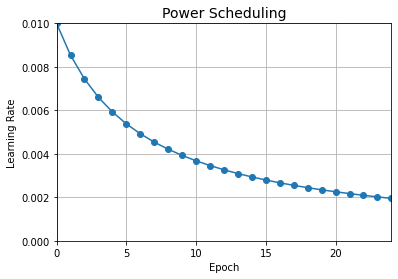

In [25]:
n_epochs = 25
learning_rate = 0.01
decay = 1e-4
batch_size = 32

# SGD with Power Scheduling
optimizer = keras.optimizers.SGD(lr=learning_rate, decay=decay)

# Build an example model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model for 25 epochs
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

# Replicate the learning rate schedule
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

# Plot the learning rate schedule
plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Exponential Scheduling
While the decay in *power scheduling* gets smaller over the course of the learning process, *exponential scheduling* keeps the same rate of decay and updates the learning rate as $\text{lr} \gets \text{lr}_0 * 0.1^{\frac{\text{epoch}}{s}}$. The interpretation is that the learning rate drops 10x each $s$ steps.

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 1.1143 - accuracy: 0.7297 - val_loss: 0.9693 - val_accuracy: 0.7078
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7630 - accuracy: 0.7744 - val_loss: 0.7304 - val_accuracy: 0.8070
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6632 - accuracy: 0.8110 - val_loss: 0.6339 - val_accuracy: 0.8208
Epoch 4/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5770 - accuracy: 0.8315 - val_loss: 0.6525 - val_accuracy: 0.8222
Epoch 5/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5520 - accuracy: 0.8381 - val_loss: 0.4839 - val_accuracy: 0.8612
Epoch 6/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4763 - accuracy: 0.8622 - val_loss: 0.5255 - val_accuracy: 0.8624
Epoch 7/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4379 - accuracy: 0.8694 - val_loss: 0.5140 - val_acc

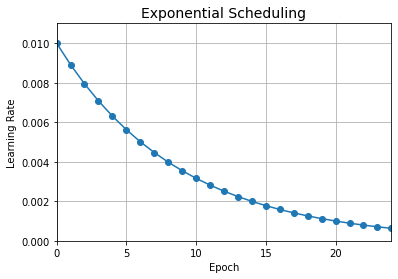

In [26]:
# Initial learning rate can be ither hard-coded
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

# Or one can write a factory function for the schedule function
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

# This is equivalent to the function defined earlier
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

# Build the same model as before
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Train the model for 25 epochs with a scheduler callback using our learning rate function
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

# Plot the learning rate schedule
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

The schedule function can take the current learning rate as a second argument:
```python
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)
```

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:

Epoch 1/25
1719/1719 [==============================] - 17s 9ms/step - loss: 1.0964 - accuracy: 0.7381 - val_loss: 0.8591 - val_accuracy: 0.7354
Epoch 2/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6380 - accuracy: 0.8002 - val_loss: 0.5800 - val_accuracy: 0.8178
Epoch 3/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6463 - accuracy: 0.8061 - val_loss: 0.7903 - val_accuracy: 0.7388
Epoch 4/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5711 - accuracy: 0.8257 - val_loss: 0.6030 - val_accuracy: 0.8280
Epoch 5/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5411 - accuracy: 0.8364 - val_loss: 0.5031 - val_accuracy: 0.8468
Epoch 6/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4668 - accuracy: 0.8561 - val_loss: 0.4598 - val_accuracy: 0.8606
Epoch 7/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4344 - accuracy: 0.8674 - val_loss: 0.4830 - val_ac

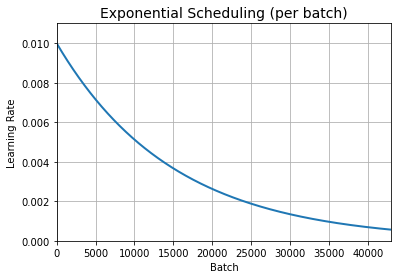

In [27]:
# Callback that applies exponential decay each SGD iteration
#  - with previous schedules the learning rate was adapted per epoch
class ExponentialDecay(keras.callbacks.Callback):
    
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = keras.backend.get_value(self.model.optimizer.lr)
        keras.backend.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = keras.backend.get_value(self.model.optimizer.lr)

# Define the SGD optimizer with initial learning rate
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
        
# Build the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model for 25 epochs passing in the exponential decay callback
n_epochs = 25
batch_size = 32
s = 20 * len(X_train) // batch_size # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[exp_decay])

# Replicate the learning rate schedule
n_steps = n_epochs * len(X_train) // batch_size
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

# Plot the learning rate schedule
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling
As the name suggests, *piecewise constant scheduling* simply defines multiple but fixed learning rates which it applies in order based on current step interval.

Epoch 1/25
1719/1719 [==============================] - 16s 9ms/step - loss: 1.1173 - accuracy: 0.7325 - val_loss: 0.8061 - val_accuracy: 0.7438
Epoch 2/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7935 - accuracy: 0.7690 - val_loss: 0.8565 - val_accuracy: 0.7978
Epoch 3/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.9195 - accuracy: 0.7502 - val_loss: 0.9441 - val_accuracy: 0.6892
Epoch 4/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.9097 - accuracy: 0.7416 - val_loss: 0.6830 - val_accuracy: 0.8026
Epoch 5/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.8189 - accuracy: 0.7520 - val_loss: 1.3275 - val_accuracy: 0.7242
Epoch 6/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6835 - accuracy: 0.8034 - val_loss: 0.6031 - val_accuracy: 0.8274
Epoch 7/25
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5304 - accuracy: 0.8403 - val_loss: 0.6102 - val_ac

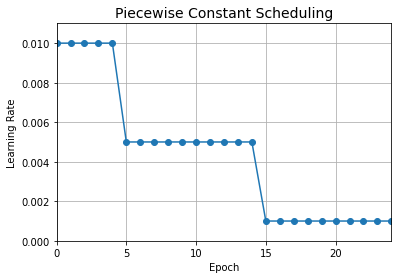

In [28]:
# Simple version of a piecewise constant schedule
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

# More general version of piecewise constant schedule
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

# This call creates schedule that is equivalent to the one defined earlier
piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

# Make a scheduler callback using the piecewise constant schedule
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

# Build a model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Train the model for 25 epochs using the piecewise constant schedule
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

# Plot the piecewise constant schedule
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling
*Performance Scheduling* works similarly to *early stopping* strategy - it measures the validation error some number of steps and if it does not increase for certain number of steps the learning rate is adjusted.

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7294 - accuracy: 0.7758 - val_loss: 0.4786 - val_accuracy: 0.8490
Epoch 2/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4837 - accuracy: 0.8383 - val_loss: 0.6440 - val_accuracy: 0.8268
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5055 - accuracy: 0.8415 - val_loss: 0.5156 - val_accuracy: 0.8496
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4992 - accuracy: 0.8463 - val_loss: 0.5767 - val_accuracy: 0.8456
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5012 - accuracy: 0.8493 - val_loss: 0.4996 - val_accuracy: 0.8536
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4848 - accuracy: 0.8571 - val_loss: 0.5720 - val_accuracy: 0.8550
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3359 - accuracy: 0.8874 - val_loss: 0.3825 - val_accuracy:

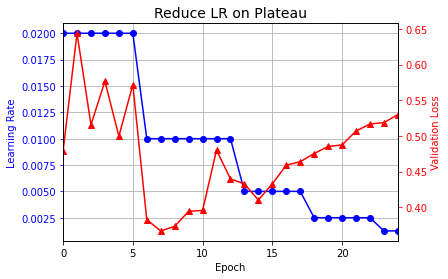

In [29]:
# Define a schedule callback that updates learning rate by given factor if a validation error hits a plateau for given no. steps
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# Define an optimizer with momentum and initial learning rate
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)

# Build a model using the optimizer
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model for 25 epochs using the performance scheduler
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

# Plot the learning rate history
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color="b")
plt.tick_params("y", colors="b")
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

# Plot the validation error to the same figure
ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color="r")
ax2.tick_params("y", colors="r")

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers
TensorFlow has nice custom schedulers that are easy to use and their state is actually persisted together with the model.

In [30]:
n_epochs = 25
batch_size = 32

# Crate an exponential decay TF scheduler and pass it directly to the SGD optimizer
s = 20 * len(X_train) // batch_size # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)

# Build a model using the optimizer
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model for 25 epochs
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5940 - accuracy: 0.7928 - val_loss: 0.4016 - val_accuracy: 0.8640
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3869 - accuracy: 0.8634 - val_loss: 0.3673 - val_accuracy: 0.8746
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3498 - accuracy: 0.8773 - val_loss: 0.3640 - val_accuracy: 0.8726
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3265 - accuracy: 0.8842 - val_loss: 0.3443 - val_accuracy: 0.8782
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3141 - accuracy: 0.8864 - val_loss: 0.3380 - val_accuracy: 0.8778
Epoch 6/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2881 - accuracy: 0.8957 - val_loss: 0.3368 - val_accuracy: 0.8796
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2835 - accuracy: 0.8989 - val_loss: 0.3298 - val_accuracy:

For the same piecewise constant scheduler we defined earlier one can use:
```python
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001],
)
```

### 1Cycle scheduling
*1Cycle scheduling* is a simple schedule that surprisingly works quite well in practice. The idea is to use three learing rates which are incremented/decremented linearly:
1. *initial learning rate* is linearly incremented from the start of the learning
1. *maximum learning rate* is the the turning point after which the learning rate is linearly decreased
1. the last few steps we use the *final learning rate*

In [31]:
# Reset the RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Define a 1Cycle scheduler callback
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None, last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
            
        # Update current learning rate and iteration
        self.iteration += 1
        keras.backend.set_value(self.model.optimizer.lr, rate)

# Build the same model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

# Train the model for 25 epochs using the 1Cycle learning rate schedule
n_epochs = 25
onecycle = OneCycleScheduler(iterations=len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_valid_scaled, y_valid), callbacks=[onecycle])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6605 - accuracy: 0.7701 - val_loss: 0.4169 - val_accuracy: 0.8578
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4042 - accuracy: 0.8561 - val_loss: 0.3785 - val_accuracy: 0.8686
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3644 - accuracy: 0.8719 - val_loss: 0.4103 - val_accuracy: 0.8550
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3407 - accuracy: 0.8766 - val_loss: 0.3502 - val_accuracy: 0.8760
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3252 - accuracy: 0.8823 - val_loss: 0.3458 - val_accuracy: 0.8764
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2893 - accuracy: 0.8946 - val_loss: 0.3509 - val_accuracy: 0.8776
Epoch 7/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2807 - accuracy: 0.8971 - val_loss: 0.3862 - val_accuracy:

## Avoiding Overfitting Through Regularization

### $\ell_1$ and $\ell_2$ regularization

In [32]:
from functools import partial

# l2 regularization with factor 0.01 (l1 works analogously)
#  - additionally there is `l1_l2(0.1, 0.01)` regularizator wihich takes two parameters
layer = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

# Template for a regularized dense layer
RegularizedDense = partial(
    keras.layers.Dense,
    activation="elu",
    kernel_initializer="he_normal",
    kernel_regularizer=keras.regularizers.l2(0.01),
)

# Build a l2 regularized model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Train the model for 2 epochs
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 18s 9ms/step - loss: 3.2680 - accuracy: 0.7932 - val_loss: 0.7201 - val_accuracy: 0.8306
Epoch 2/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7299 - accuracy: 0.8239 - val_loss: 0.6843 - val_accuracy: 0.8368


### Dropout
Dropout is simple yet successful regularization technique which works as follows: During training we for each instance randomly with probability $p$ switch off neurons (i.e. output forced to be 0) in all but the output layer (i.e. including inputs). This way each neuron has to learn something useful and cannot be dependent on other neurons which makes the network as a whole more robust.

A small adjustment has to be made: because training phase randomly switches neurons off, simply applying learned weights to test instances would increase the input signal. To compensate for this effect, after training all weights from dropout layers are reduced accordingly.

Finally, dropout regularization prolongs the convergence (i.e. longer training) but the model typically generalizes better.

In [33]:
# Dropout can be implemented by adding extra `Dropout` layers
#  - these layers automatically adjust weights after training
#  - however, it is good to re-evaluate training and validation erros after training
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Train the model for few epochs
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 0.7128 - accuracy: 0.7649 - val_loss: 0.3672 - val_accuracy: 0.8656
Epoch 2/2
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4319 - accuracy: 0.8423 - val_loss: 0.3477 - val_accuracy: 0.8674


### Alpha Dropout
*Alpha Dropout* is a variation of droptout regularization that preserves the mean and variance of neuron outputs for self-normalizing networks (e.g. using *SELU* activations) where standard dropout would break this property.

In [34]:
# Reset the RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Build a model using dense layers with SELU activations
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model for 20 epochs
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

# Evaluate the model on the test set
model.evaluate(X_test_scaled, y_test)

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8023 - accuracy: 0.7146 - val_loss: 0.5778 - val_accuracy: 0.8446
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5662 - accuracy: 0.7903 - val_loss: 0.5161 - val_accuracy: 0.8518
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5260 - accuracy: 0.8061 - val_loss: 0.4906 - val_accuracy: 0.8596
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5126 - accuracy: 0.8094 - val_loss: 0.4828 - val_accuracy: 0.8602
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5076 - accuracy: 0.8129 - val_loss: 0.4254 - val_accuracy: 0.8692
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4795 - accuracy: 0.8206 - val_loss: 0.4681 - val_accuracy: 0.8642
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4717 - accuracy: 0.8265 - val_loss: 0.4701 - val_accuracy

[0.48092955350875854, 0.8583999872207642]

### MC Dropout
*Monte-Carlo Droupout* is a useful addition to standard dropout that improves model's prediction confidence and slightly accuracy. It works as follows:
1. Train a model with droupout as usual
1. Instead of single prediction make several with training flag turned on (to force new dropout each time)
1. Return a mean prediction over these samples

In [35]:
# Reset the RNG state
tf.random.set_seed(42)
np.random.seed(42)

n_samples = 100

# Use the last model to make 100 predictions (each with new dropout) and stack them
y_probas = np.stack([model(X_test_scaled, training=True) for _ in range(n_samples)])

# Final prediction is the mean over these samples
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [36]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.51, 0.  , 0.48]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.76, 0.  , 0.23]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.36, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.73]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.6 , 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.32, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.1 , 0.  , 0.86]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.08, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.08, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.21, 0.  , 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.28, 0.  , 0.66]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.31, 0.  , 0

In [38]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.19, 0.  , 0.73]],
      dtype=float32)

In [39]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.01, 0.2 , 0.  , 0.24]],
      dtype=float32)

In [40]:
y_pred = np.argmax(y_proba, axis=1)

accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8644

In [41]:
# Reset the RNG state
tf.random.set_seed(42)
np.random.seed(42)

# For networks with special layers (e.g. batch normalized) one can subclass the `Dropout` class

class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

# Reuse previous model but replace all Dropout layers with custom MC Dropout
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

# Show the model structure
mc_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_258 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_259 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_260 (Dense)            (None, 10)              

In [42]:
# Build the MC model
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Pass weights from previous (non-MC) model to the MC model
mc_model.set_weights(model.get_weights())

def mc_predict(X):
    return np.mean([mc_model.predict(X) for _ in range(n_samples)], axis=0)

# Make a MC prediction (and round it)
np.round(mc_predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.21, 0.  , 0.69]],
      dtype=float32)

### Max-Norm Regularization
Last but not least techinque is *max-norm regularization*. This approach constrains each neuron's weights $\mathbf{w}$ by as new hyper-parameter $r$ as follows: $\|\mathbf{w}\|_2 \le r$.

However, this constraint is not added to the loss function but after each training step the weights are rescaled if needed: $\mathbf{w} \gets \mathbf{w} \frac{r}{\|\mathbf{2}\|_2}$.

Finall this regularization can both prevent overfitting as well as help with the vanishing gradient problem.

In [43]:
# Create new template for max-norm dense layers
#  - `kernel_constraint` function is applied to layers weights
#  - `kernel_constraint` can also be used to rescale biases
MaxNormDense = partial(
    keras.layers.Dense,
    activation="selu", kernel_initializer="lecun_normal",
    kernel_constraint=keras.constraints.max_norm(1.),
)

# Build a model with max-norm dense layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Trian the model for 2 epochs
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 0.5754 - accuracy: 0.8028 - val_loss: 0.3723 - val_accuracy: 0.8654
Epoch 2/2
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3572 - accuracy: 0.8689 - val_loss: 0.3734 - val_accuracy: 0.8670


## Exercises

### Deep Learning on CIFAR10
Build a DNN with 20 hidden layers of 100 neurons each. Use He initialization and the ELU activation function.

In [44]:
# Reset TF session and RNG state
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Load and split the CIFAR10 dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

val_split = 5000
X_train = X_train_full[val_split:]
y_train = y_train_full[val_split:]
X_valid = X_train_full[:val_split]
y_valid = y_train_full[:val_split]

# Build the model
n_hidden = 20

inputs = [keras.layers.Flatten(input_shape=[32, 32, 3])]
hidden = [
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal")
    for _ in range(n_hidden)
]
outputs = [keras.layers.Dense(10, activation="softmax")]

model = keras.models.Sequential(inputs + hidden + outputs)

optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Make necessary callbacks
model_path = os.path.join("data", "my_cifar10_model.h5")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join("logs", "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# Train the model for 100 epochs with early stopping
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

# Load and evaluate the best model
model = keras.models.load_model(model_path)
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 27s 15ms/step - loss: 9.5594 - accuracy: 0.1386 - val_loss: 2.1826 - val_accuracy: 0.2166
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 2.0939 - accuracy: 0.2397 - val_loss: 2.1387 - val_accuracy: 0.2210
Epoch 3/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.9633 - accuracy: 0.2788 - val_loss: 1.9865 - val_accuracy: 0.2802
Epoch 4/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.8826 - accuracy: 0.3152 - val_loss: 2.0808 - val_accuracy: 0.2704
Epoch 5/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.8108 - accuracy: 0.3417 - val_loss: 1.7929 - val_accuracy: 0.3438
Epoch 6/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7575 - accuracy: 0.3618 - val_loss: 1.7592 - val_accuracy: 0.3676
Epoch 7/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7076 - accuracy: 0.3841 - val_loss: 1

[1.4964699745178223, 0.47099998593330383]

Now let's try adding Batch Normalization.

In [45]:
from itertools import chain

# Reset TF session and RNG state
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Build the model
n_hidden = 20

def build_hidden_layer():
    dense = keras.layers.Dense(100, kernel_initializer="he_normal")
    bn = keras.layers.BatchNormalization()
    activation = keras.layers.Activation("elu")
    return dense, bn, activation

inputs = [keras.layers.Flatten(input_shape=[32, 32, 3]), keras.layers.BatchNormalization()]
hidden = list(chain.from_iterable(build_hidden_layer() for _ in range(n_hidden)))
outputs = [keras.layers.Dense(10, activation="softmax")]

model = keras.models.Sequential(inputs + hidden + outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Nadam(lr=5e-4),
    metrics=["accuracy"]
)

# Make necessary callbacks
model_path = os.path.join("data", "my_cifar10_bn_model.h5")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join("logs", "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# Train the model for 100 epochs with early stopping
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

# Load and evaluate the best model
model = keras.models.load_model(model_path)
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 53s 25ms/step - loss: 1.9801 - accuracy: 0.2895 - val_loss: 1.6528 - val_accuracy: 0.4022
Epoch 2/100
1407/1407 [==============================] - 32s 22ms/step - loss: 1.6768 - accuracy: 0.4019 - val_loss: 1.5797 - val_accuracy: 0.4302
Epoch 3/100
1407/1407 [==============================] - 32s 22ms/step - loss: 1.6136 - accuracy: 0.4290 - val_loss: 1.5193 - val_accuracy: 0.4554
Epoch 4/100
1407/1407 [==============================] - 32s 22ms/step - loss: 1.5459 - accuracy: 0.4490 - val_loss: 1.4863 - val_accuracy: 0.4716
Epoch 5/100
1407/1407 [==============================] - 29s 21ms/step - loss: 1.5037 - accuracy: 0.4664 - val_loss: 1.4484 - val_accuracy: 0.4826
Epoch 6/100
1407/1407 [==============================] - 32s 23ms/step - loss: 1.4653 - accuracy: 0.4770 - val_loss: 1.4327 - val_accuracy: 0.4908
Epoch 7/100
1407/1407 [==============================] - 32s 22ms/step - loss: 1.4323 - accuracy: 0.4906 - val_loss: 1

[1.3092141151428223, 0.5490000247955322]

Let's try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes.

In [46]:
# Reset TF session and RNG state
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Build the model
n_hidden = 20

inputs = [keras.layers.Flatten(input_shape=[32, 32, 3])]
hidden = [
    keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")
    for _ in range(n_hidden)
]
outputs = [keras.layers.Dense(10, activation="softmax")]

model = keras.models.Sequential(inputs + hidden + outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Nadam(lr=7e-4),
    metrics=["accuracy"],
)

# Make necessary callbacks
model_path = os.path.join("data", "my_cifar10_selu_model.h5")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join("logs", "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# Normalize the inputs
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

# Train the model for 100 epochs with early stopping
model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)

# Load and evaluate the best model
model = keras.models.load_model(model_path)
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 29s 16ms/step - loss: 2.0569 - accuracy: 0.2692 - val_loss: 1.9222 - val_accuracy: 0.2946
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7364 - accuracy: 0.3772 - val_loss: 1.7236 - val_accuracy: 0.3810
Epoch 3/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6291 - accuracy: 0.4230 - val_loss: 1.6511 - val_accuracy: 0.4114
Epoch 4/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5421 - accuracy: 0.4552 - val_loss: 1.6436 - val_accuracy: 0.4262
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4883 - accuracy: 0.4738 - val_loss: 1.5848 - val_accuracy: 0.4354
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4310 - accuracy: 0.5004 - val_loss: 1.5300 - val_accuracy: 0.4614
Epoch 7/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.3827 - accuracy: 0.5172 - val_loss: 1

[1.4608896970748901, 0.5152000188827515]

Let's try regularizing the model with alpha dropout and then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [47]:
# Reset TF session and RNG state
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Build the model
inputs = [keras.layers.Flatten(input_shape=[32, 32, 3])]
hidden = [keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")] + [keras.layers.AlphaDropout(rate=0.1)]
outputs = [keras.layers.Dense(10, activation="softmax")]

model = keras.models.Sequential(inputs + hidden + outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Nadam(lr=5e-4),
    metrics=["accuracy"],
)

# Make necessary callbacks
model_path = os.path.join("data", "my_cifar10_alpha_dropout_model.h5")

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# Normalize the inputs
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

# Train the model for 100 epochs with early stoppings
model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)

# Load and evaluate the best model
model = keras.models.load_model(model_path)
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 19s 11ms/step - loss: 2.2196 - accuracy: 0.3155 - val_loss: 1.7221 - val_accuracy: 0.4444
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6319 - accuracy: 0.4400 - val_loss: 1.6066 - val_accuracy: 0.4468
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5096 - accuracy: 0.4705 - val_loss: 1.4944 - val_accuracy: 0.4896
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4412 - accuracy: 0.4927 - val_loss: 1.4817 - val_accuracy: 0.4892
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3936 - accuracy: 0.5122 - val_loss: 1.4751 - val_accuracy: 0.4968
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3612 - accuracy: 0.5200 - val_loss: 1.4313 - val_accuracy: 0.5048
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3343 - accuracy: 0.5270 - val_loss: 1

[1.4110283851623535, 0.5239999890327454]

In [48]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)


def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)


def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)


# Reset TF session and RNG state
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Replace dropout layer by MC dropout
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

# Make prediction and compute accuracy of the MC model
y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.52

Finally, lets' retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [49]:
# Reset TF session and RNG state
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Build new model
inputs = [keras.layers.Flatten(input_shape=[32, 32, 3])]
hidden = [keras.layers.Dense(100, kernel_initializer="lecun_normal", activation="selu")] + [keras.layers.AlphaDropout(rate=0.1)]
outputs = [keras.layers.Dense(10, activation="softmax")]

model = keras.models.Sequential(inputs + hidden + outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-2),
    metrics=["accuracy"],
)

# Train the model for 15 epochs with 1Cycle learning rate scheduling
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=128, validation_data=(X_valid_scaled, y_valid), callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 4s 10ms/step - loss: 2.1928 - accuracy: 0.2610 - val_loss: 1.8953 - val_accuracy: 0.3784
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 1.8472 - accuracy: 0.3669 - val_loss: 1.6621 - val_accuracy: 0.4308
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 1.7053 - accuracy: 0.4032 - val_loss: 1.5979 - val_accuracy: 0.4478
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5956 - accuracy: 0.4406 - val_loss: 1.5322 - val_accuracy: 0.4662
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.5269 - accuracy: 0.4630 - val_loss: 1.5032 - val_accuracy: 0.4728
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4661 - accuracy: 0.4820 - val_loss: 1.4487 - val_accuracy: 0.4948
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4383 - accuracy: 0.4951 - val_loss: 1.4342 - val_accuracy: 0.4992
Epoch